# Task 2: Wavelet decomposition

In [185]:
%%capture
import matplotlib.pyplot as plt
import numpy as np

import pywt
import pywt.data
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

from sklearn.metrics import mean_squared_error
from math import sqrt

from ipynb.fs.full.task1 import convert_pgm_to_matrix, show_image_greyscale

## With Package PyWT
Wavelete Transform with Haar Coeeficient

### Step 1: Load Image

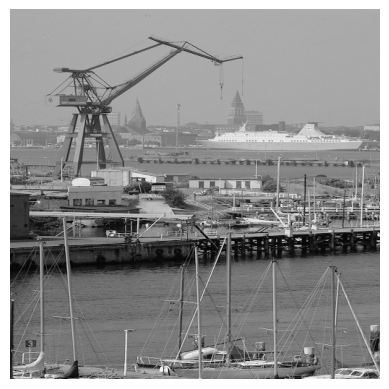

In [186]:
# Load image
im = convert_pgm_to_matrix("./Dataset/kiel.pgm")
show_image_greyscale(im)

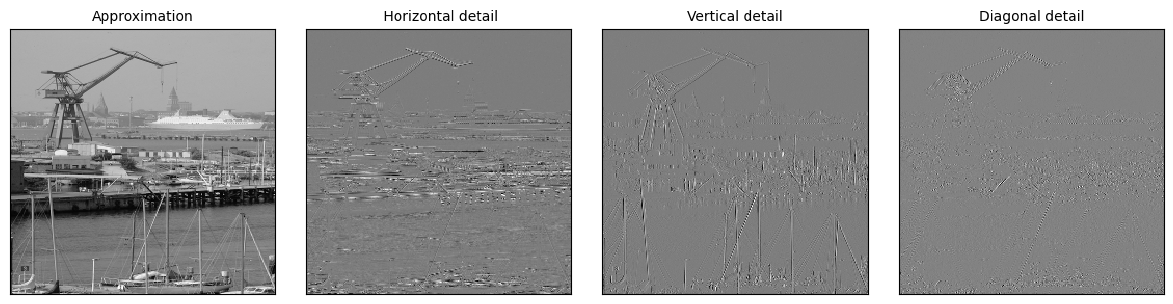

In [187]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail', 'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(im, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [188]:
# Forward Discrete Wavelet Transform
coeffs2 = pywt.dwt2(im, 'haar')  # Decompose the image
LL, (LH, HL, HH) = coeffs2       # Unpack the coefficients

# Reconstruct the image using the Inverse Discrete Wavelet Transform
inverse_im = pywt.idwt2((LL, (LH, HL, HH)), 'haar')

In [189]:
mse = mean_squared_error(im, inverse_im)
print(mse)

2.6562430266726254e-32


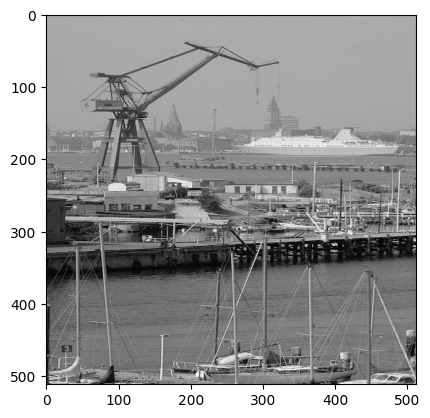

In [190]:
plt.imshow(inverse_im, cmap=plt.cm.gray)

# By Myself
- W(m) A -> Should show Low and high frequency
- W(m) A W(n)T -> Show LL, LH, HL, HH (This is 1 level)

In [191]:
im.shape

(512, 512)

In [192]:
w = np.zeros_like(im)
haar_filter = sqrt(2)/2
num_image_rows = im.shape[0]
half_num_image_rows = num_image_rows/2
for i in range(0,512):
    # Low pass filter
    # each column is M/2 weighted average
    if i < half_num_image_rows - 1:
        first_poisition_with_filter = i+i
        second_position_with_filter = first_poisition_with_filter + 1 
        w[i][first_poisition_with_filter] = haar_filter 
        w[i][second_position_with_filter] = haar_filter

    # High pass filter
    # each column is M/2 weighted differences
    else:
        j = i - half_num_image_rows
        first_poisition_with_filter = int(j+j)
        second_position_with_filter = first_poisition_with_filter + 1 
        w[i][first_poisition_with_filter] = -haar_filter 
        w[i][second_position_with_filter] = haar_filter

In [193]:
# Perform matrix product of two numpy arrays
res = np.matmul(w, im)

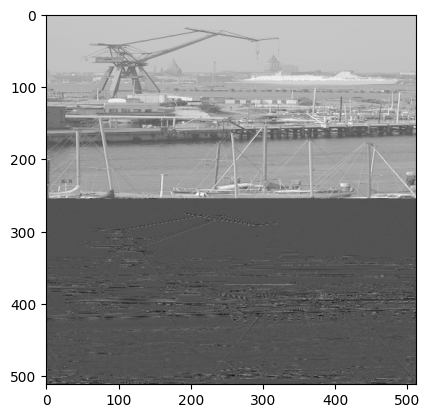

In [194]:
plt.imshow(res, cmap=plt.cm.gray)

In [195]:
w.shape

(512, 512)

In [196]:
w_transpose = w.transpose()

In [197]:
w_transpose[:, 0]

array([0.70710678, 0.70710678, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [198]:
level_1 = np.matmul(res, w_transpose)

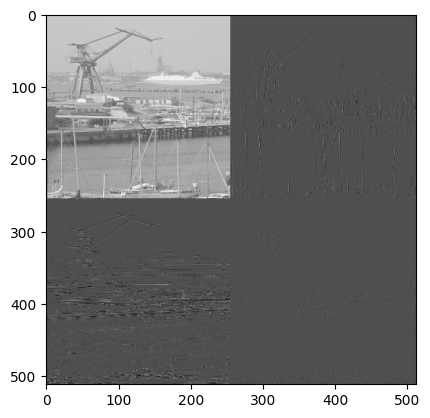

In [199]:
plt.imshow(level_1, cmap=plt.cm.gray)

In [200]:
l_level_1 = level_1[0:256, 0:256]

In [201]:
w_level_2 = np.zeros_like(l_level_1)
haar_filter = sqrt(2)/2
num_image_rows = l_level_1.shape[0]
half_num_image_rows = num_image_rows/2
for i in range(0,num_image_rows):
    # Low pass filter
    # each column is M/2 weighted average
    if i < half_num_image_rows - 1:
        first_poisition_with_filter = i+i
        second_position_with_filter = first_poisition_with_filter + 1 
        w_level_2[i][first_poisition_with_filter] = haar_filter 
        w_level_2[i][second_position_with_filter] = haar_filter

    # High pass filter
    # each column is M/2 weighted differences
    else:
        j = i - half_num_image_rows
        first_poisition_with_filter = int(j+j)
        second_position_with_filter = first_poisition_with_filter + 1 
        w_level_2[i][first_poisition_with_filter] = -haar_filter 
        w_level_2[i][second_position_with_filter] = haar_filter

In [202]:
wl = np.matmul(w_level_2, l_level_1)
level_2 = np.matmul(wl, w_level_2.transpose())

In [203]:
level_2.shape

(256, 256)

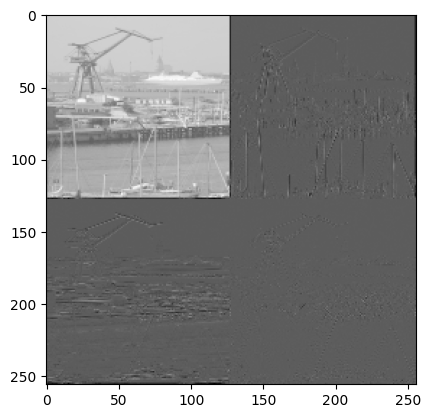

In [204]:
plt.imshow(level_2, cmap=plt.cm.gray)

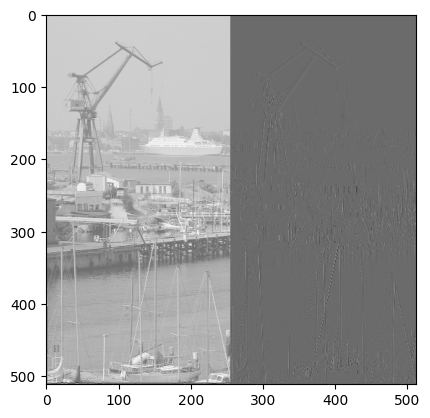

In [205]:
# level_1
a = np.matmul(w_transpose, level_1)
b = np.matmul(a, w)

plt.imshow(a, cmap=plt.cm.gray)

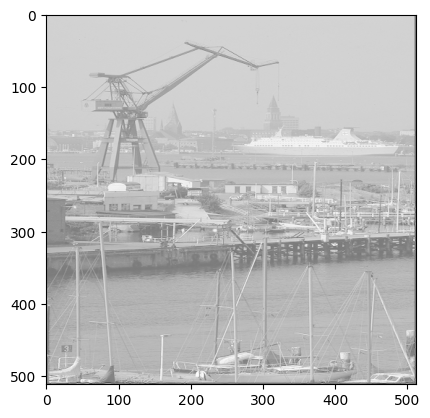

In [206]:
plt.imshow(b, cmap=plt.cm.gray)

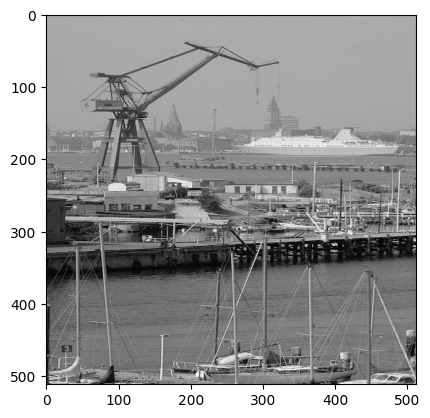

In [207]:
plt.imshow(im, cmap=plt.cm.gray)

In [208]:
mse = mean_squared_error(im,b)
print(mse)

0.002470436961501435


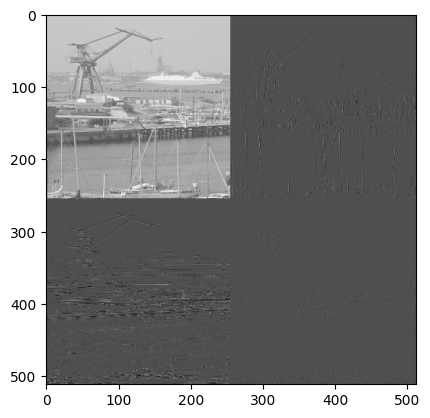

In [209]:
# level_1
a = np.matmul(level_1, w_transpose)

plt.imshow(level_1, cmap=plt.cm.gray)

In [210]:
level_1

array([[ 1.32745098e+00,  1.32549020e+00,  1.33333333e+00, ...,
        -1.96078431e-03, -1.96078431e-03, -1.96078431e-03],
       [ 1.32352941e+00,  1.33333333e+00,  1.32745098e+00, ...,
         3.92156863e-03, -1.96078431e-03,  3.92156863e-03],
       [ 1.32941176e+00,  1.32549020e+00,  1.32156863e+00, ...,
         1.58966749e-17, -1.96078431e-03, -1.96078431e-03],
       ...,
       [-7.84313725e-03,  5.88235294e-02, -7.05882353e-01, ...,
        -2.29411765e-01,  1.19607843e-01, -1.62745098e-01],
       [-1.96933386e-18,  2.35294118e-02,  1.50980392e-01, ...,
         3.13725490e-02, -7.84313725e-02, -1.98039216e-01],
       [-5.88235294e-03,  9.80392157e-03, -8.03921569e-02, ...,
        -4.31372549e-02,  1.45098039e-01, -7.45098039e-02]])

In [211]:
A = np.array((2,2,4,4,6,6,8,8,10,10,14,14,12,12,16,16))
A = A.reshape(4,4)


In [212]:
A

array([[ 2,  2,  4,  4],
       [ 6,  6,  8,  8],
       [10, 10, 14, 14],
       [12, 12, 16, 16]])

In [213]:
y = np.array((1, 1, 0, 0, 0,0,1,1, -1,1,0,0, 0,0,-1,1))
y = np.sqrt(1/2) * y.reshape(4,4)
y

array([[ 0.70710678,  0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.70710678,  0.70710678],
       [-0.70710678,  0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.70710678,  0.70710678]])

In [214]:
y

array([[ 0.70710678,  0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.70710678,  0.70710678],
       [-0.70710678,  0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.70710678,  0.70710678]])

In [215]:
wA = np.matmul(y,A)

In [216]:
wA

array([[ 5.65685425,  5.65685425,  8.48528137,  8.48528137],
       [15.55634919, 15.55634919, 21.21320344, 21.21320344],
       [ 2.82842712,  2.82842712,  2.82842712,  2.82842712],
       [ 1.41421356,  1.41421356,  1.41421356,  1.41421356]])

In [217]:
wT = y.transpose()
wT

array([[ 0.70710678,  0.        , -0.70710678,  0.        ],
       [ 0.70710678,  0.        ,  0.70710678,  0.        ],
       [ 0.        ,  0.70710678,  0.        , -0.70710678],
       [ 0.        ,  0.70710678,  0.        ,  0.70710678]])

In [218]:
B = np.matmul(wA, wT)
B

array([[ 8., 12.,  0.,  0.],
       [22., 30.,  0.,  0.],
       [ 4.,  4.,  0.,  0.],
       [ 2.,  2.,  0.,  0.]])

In [219]:
inverse_one = np.matmul(wT, B)
inverse_one

array([[ 2.82842712,  5.65685425,  0.        ,  0.        ],
       [ 8.48528137, 11.3137085 ,  0.        ,  0.        ],
       [14.14213562, 19.79898987,  0.        ,  0.        ],
       [16.97056275, 22.627417  ,  0.        ,  0.        ]])

In [220]:
inverse_two = np.matmul(inverse_one, w)
inverse_two

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 512 is different from 4)

In [ ]:
inverse_two

array([[ 32.,  32.,  64.,  64.],
       [ 96.,  96., 128., 128.],
       [160., 160., 224., 224.],
       [192., 192., 256., 256.]])

In [ ]:
mse = mean_squared_error(A,inverse_two)
print(mse)

22950.000000000015


In [225]:
# Input matrix
A = np.array([2, 2, 4, 4, 
              6, 6, 8, 8, 
              10, 10, 14, 14, 
              12, 12, 16, 16]).reshape(4, 4)

# Define the Haar matrix W (orthogonal)
W = (1 / np.sqrt(2)) * np.array([
    [1, 1, 0, 0],
    [0, 0, 1, 1],
    [1, -1, 0, 0],
    [0, 0, 1, -1]
])

# Transpose of Haar matrix
W_T = W.transpose()

# Forward transform
wA = np.matmul(W, A)    # Apply Haar transform to column
B = np.matmul(wA, W_T)  # Apply Haar transform to row

# Inverse transform
inverse_one = np.matmul(W_T, B)  # Apply inverse Haar transform to columns
A_reconstructed = np.matmul(inverse_one, W)  # Apply inverse Haar transform to rows

# Print results
print("Original Matrix A:")
print(A)

print("Apply Haar transform to rows")
print(wA)

print("\nTransformed Matrix B (Haar coefficients):")
print(B)

print("\n Inverse One")
print(inverse_one)

print("\nReconstructed Matrix A (after inverse transform):")
print(A_reconstructed)


Original Matrix A:
[[ 2  2  4  4]
 [ 6  6  8  8]
 [10 10 14 14]
 [12 12 16 16]]
Apply Haar transform to rows
[[ 5.65685425  5.65685425  8.48528137  8.48528137]
 [15.55634919 15.55634919 21.21320344 21.21320344]
 [-2.82842712 -2.82842712 -2.82842712 -2.82842712]
 [-1.41421356 -1.41421356 -1.41421356 -1.41421356]]

Transformed Matrix B (Haar coefficients):
[[ 8. 12.  0.  0.]
 [22. 30.  0.  0.]
 [-4. -4.  0.  0.]
 [-2. -2.  0.  0.]]

 Inverse One
[[ 2.82842712  5.65685425  0.          0.        ]
 [ 8.48528137 11.3137085   0.          0.        ]
 [14.14213562 19.79898987  0.          0.        ]
 [16.97056275 22.627417    0.          0.        ]]

Reconstructed Matrix A (after inverse transform):
[[ 2.  2.  4.  4.]
 [ 6.  6.  8.  8.]
 [10. 10. 14. 14.]
 [12. 12. 16. 16.]]


In [227]:
res = np.matmul(A, W_T)
res

array([[ 2.82842712,  5.65685425,  0.        ,  0.        ],
       [ 8.48528137, 11.3137085 ,  0.        ,  0.        ],
       [14.14213562, 19.79898987,  0.        ,  0.        ],
       [16.97056275, 22.627417  ,  0.        ,  0.        ]])

In [228]:
a = (1 / np.sqrt(2)) * np.array([
    [1, 1],
    [1, -1]
])

In [230]:
a

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [229]:
np.linalg.inv(a)

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [231]:
1/sqrt(2) * 1/2

0.35355339059327373

In [232]:
1/(1*-1 - 1*1)

-0.5

In [233]:
a_t = a.transpose()

In [234]:
np.matmul(a, a_t)

array([[1., 0.],
       [0., 1.]])